Explore a API do Keras e aprenda como utilizar os recursos explicados aqui: funções de ativação, inicialização de pesos, normalização por lote e dropout. Aplique em alguns modelos MLP para os conjuntos MNIST e Fashion MNIST. Não fique preso ao que foi mencionado na aula: pesquise sobre e utilize outras funções de ativação, inicializações, etc. O objetivo é que você ganhe familiaridade com a biblioteca e autonomia para navegar na API e implementar os recursos em seus modelos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

from random import choices

# Digit Recognizer

## Importando Dataset

In [2]:
digits_PATH = '/kaggle/input/digit-recognizer/'

digits_train = pd.read_csv(digits_PATH+'train.csv')

In [3]:
X, y = digits_train.iloc[:,1:].values/255, digits_train.iloc[:,0].values

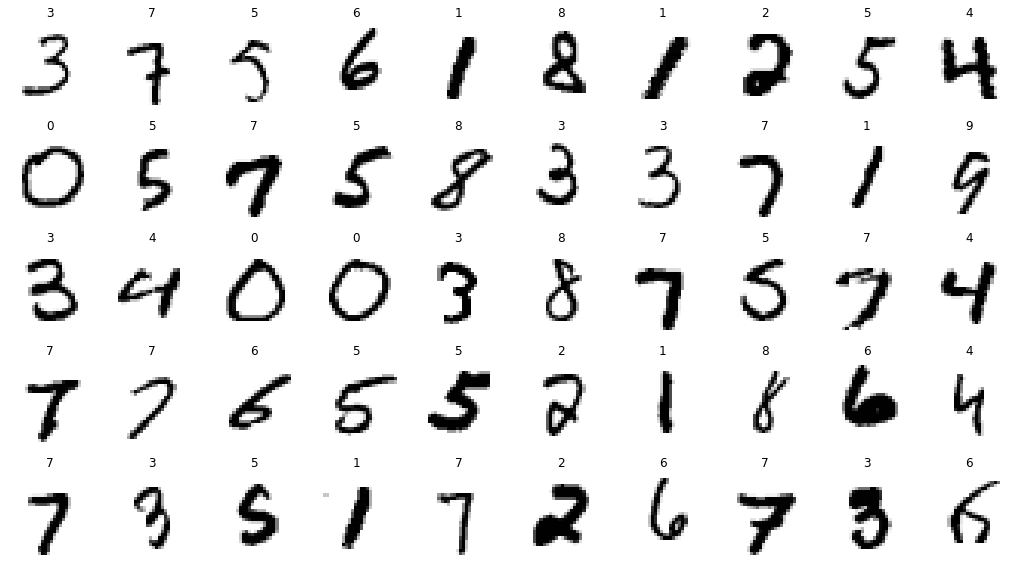

In [4]:
N_images = 50

# localização dos exemplos na matriz de dados 
rows = choices(range(0, 42000), k=N_images)

# selecionando os dígitos, já no formato de matriz
digitos = [X[i].reshape(28,28) for i in rows]
label_value = y[rows]

# criando figura do matplotlib
fig, ax = plt.subplots(5, int(len(rows)/5),figsize=(18,10))

# plotando!
for i in range(len(rows)):
    j = int(i/10)
    k = i - j*10
    ax[j, k].imshow(digitos[i], cmap = plt.cm.binary, interpolation="nearest")
    ax[j, k].set_title(label_value[i])
    ax[j, k].axis('off')

### Funcões Auxiliares

In [5]:
def compare_confusion_matriz(modelo, X_treino, X_validacao, y_treino, y_validacao):
    
    y_validacao_pred = modelo.predict(X_validacao)
    y_train_pred = modelo.predict(X_treino)
    
    if isinstance(m, keras.models.Sequential):
        y_validacao_pred = np.argmax(y_validacao_pred, axis=1)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    
    confusao_val = confusion_matrix(y_validacao, y_validacao_pred)
    confusao_tr = confusion_matrix(y_treino, y_train_pred)
    
    fig, ax = plt.subplots(1, 2,figsize=(20,10))
    sns.heatmap(pd.DataFrame(confusao_val), ax=ax[0], cbar=False, annot=True)
    ax[0].set_title('Matriz de confusão validação', size=20)
    ax[0].set_yticklabels(ax[0].get_xticklabels(), rotation=0, size=15)
    ax[0].set_xticklabels(ax[0].get_yticklabels(), rotation=0, size=15)
    sns.heatmap(pd.DataFrame(confusao_tr), ax=ax[1], cbar=False, annot=True)
    ax[1].set_title('Matriz de confusão treino', size=20)
    ax[1].set_yticklabels(ax[1].get_xticklabels(), rotation=0, size=15)
    ax[1].set_xticklabels(ax[1].get_yticklabels(), rotation=0, size=15)
    plt.show()

In [6]:
def acuracia(modelo, X_treino, X_validacao, y_treino, y_validacao):

    y_validacao_pred = modelo.predict(X_validacao)
    y_train_pred = modelo.predict(X_treino)
    
    if isinstance(m, keras.models.Sequential):
        y_validacao_pred = np.argmax(y_validacao_pred, axis=1)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    
    acc_tr = accuracy_score(y_treino, y_train_pred)
    acc_val = accuracy_score(y_validacao, y_validacao_pred)

    return {'Acurácia do treino': acc_tr, 'Acurácia da validação': acc_val}

In [7]:
def plot_erros(model, X, target):

    y_pred = model.predict(X)
    y_pred = np.argmax(y_pred, axis=1)
    
    predicao = pd.DataFrame(data={'predicao':y_pred, 'target':target})
    predicao_erros = predicao[predicao.predicao != predicao.target]
    
    N_images = 50

    # localização dos exemplos na matriz de dados 
    rows = predicao_erros.index[:N_images]

    # selecionando os dígitos, já no formato de matriz
    digitos = [X[i].reshape(28,28) for i in rows]
    label = predicao.loc[rows, 'target']
    label_errors = predicao.loc[rows, 'predicao']

    # criando figura do matplotlib
    fig, ax = plt.subplots(5, int(len(rows)/5),figsize=(18,10))

    # plotando!
    for i in range(len(rows)):
        j = int(i/10)
        k = i - j*10
        ax[j, k].imshow(digitos[i], cmap = plt.cm.binary, interpolation="nearest")
        ax[j, k].set_title(f'{label.iloc[i]} confused {label_errors.iloc[i]}')
        ax[j, k].axis('off')

## Keras

In [8]:
X_treino, X_validacao, y_treino, y_validacao = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
m = keras.models.Sequential()

m.add(keras.layers.Dense(200, input_shape = (784,), activation="relu"))
m.add(keras.layers.Dense(10, activation="softmax"))

m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
%%time 

H = m.fit(X_treino, y_treino, 
          batch_size = 200, epochs = 10, 
          validation_data = (X_validacao, y_validacao));

Epoch 1/10
168/168 [==============================] - 1s 5ms/step - loss: 0.4762 - accuracy: 0.8707 - val_loss: 0.2593 - val_accuracy: 0.9279
Epoch 2/10
168/168 [==============================] - 1s 4ms/step - loss: 0.2154 - accuracy: 0.9382 - val_loss: 0.2056 - val_accuracy: 0.9427
Epoch 3/10
168/168 [==============================] - 1s 4ms/step - loss: 0.1589 - accuracy: 0.9558 - val_loss: 0.1650 - val_accuracy: 0.9524
Epoch 4/10
168/168 [==============================] - 1s 4ms/step - loss: 0.1246 - accuracy: 0.9653 - val_loss: 0.1456 - val_accuracy: 0.9588
Epoch 5/10
168/168 [==============================] - 1s 4ms/step - loss: 0.1004 - accuracy: 0.9726 - val_loss: 0.1300 - val_accuracy: 0.9624
Epoch 6/10
168/168 [==============================] - 1s 4ms/step - loss: 0.0846 - accuracy: 0.9760 - val_loss: 0.1233 - val_accuracy: 0.9655
Epoch 7/10
168/168 [==============================] - 1s 4ms/step - loss: 0.0709 - accuracy: 0.9809 - val_loss: 0.1200 - val_accuracy: 0.9650
Epoch 

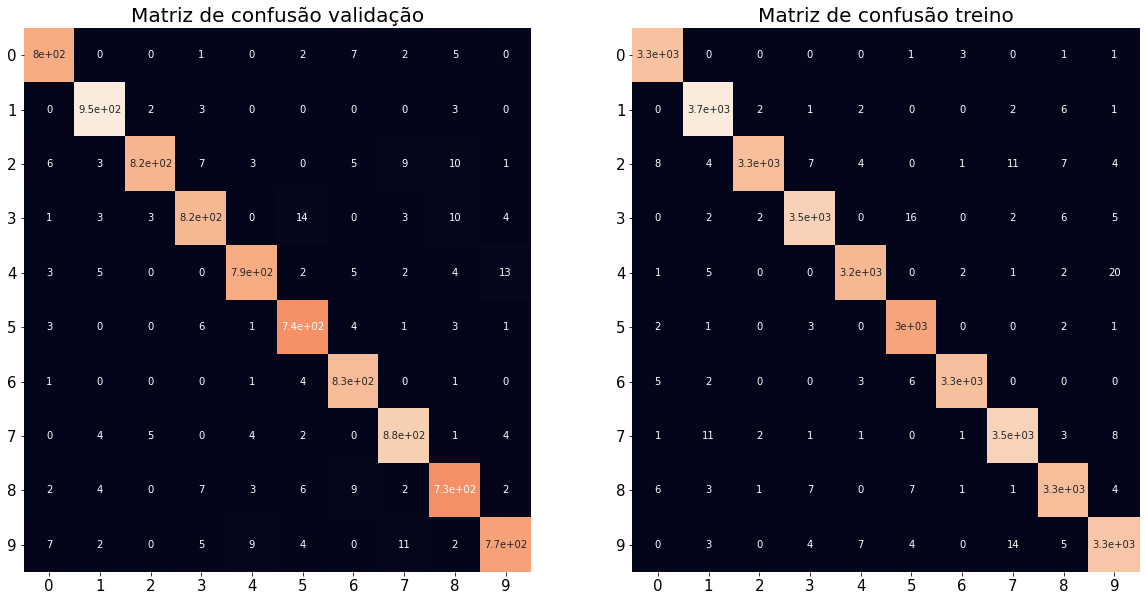

In [11]:
compare_confusion_matriz(m, X_treino, X_validacao, y_treino, y_validacao)

In [12]:
acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

{'Acurácia do treino': 0.9925595238095238,
 'Acurácia da validação': 0.9688095238095238}

O modelo apresentou uma acurácia de 97% o que é um bom resultado. O programa confunde 9 com 4 (que é bastante lógico), 7 com 1 (também aceitável), 7 com 2, 7 com 9. Vamos avaliar os números que foram avaliados errado.

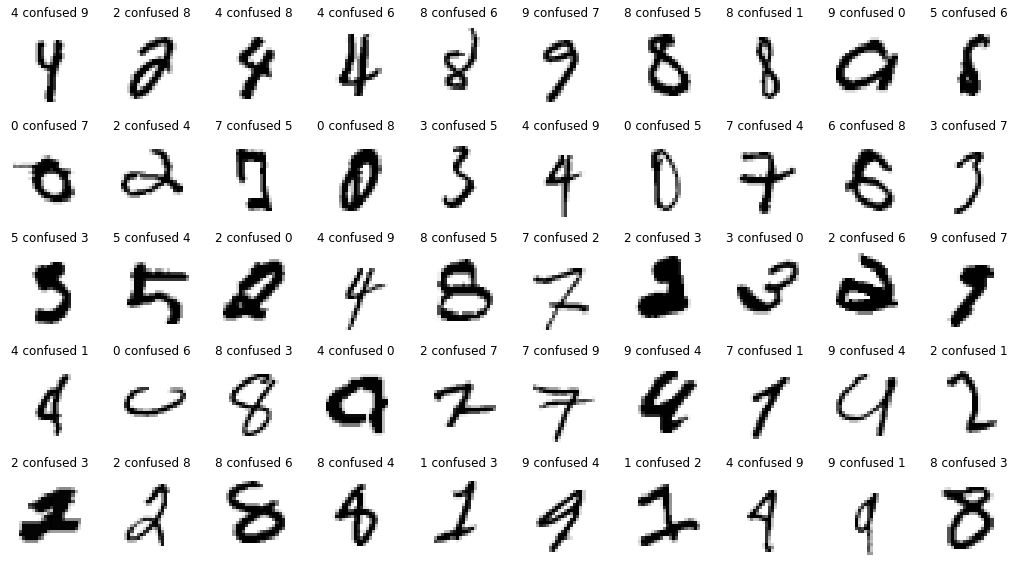

In [13]:
plot_erros(m, X_validacao, y_validacao)

É possível ver claramente o porque do programa confundir muitos desses números. O primeiro elemento eu chutaria que é um 8, segundo o gabarito é um 9 e o programa chutou 3, última linha há dois números que são praticamente iguais porem um é 9 e o outro 4. Porém alguns números são claros de identificar, logo o modelo pode ser melhorado.

## Otimização do modelo

### Número de neurônios na camada oculta

In [14]:
%%time 

neurons_list = [10, 20, 40, 100, 150, 200, 300, 400, 600, 1000]
acuracia_dict = dict()

for value in neurons_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(value, input_shape = (784,), activation="relu"))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    H = m.fit(X_treino, y_treino, 
              batch_size = 200, epochs = 20, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[value] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/20
168/168 [==============================] - 1s 3ms/step - loss: 1.2759 - accuracy: 0.6456 - val_loss: 0.6455 - val_accuracy: 0.8481
Epoch 2/20
168/168 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.8694 - val_loss: 0.4214 - val_accuracy: 0.8889
Epoch 3/20
168/168 [==============================] - 0s 3ms/step - loss: 0.3758 - accuracy: 0.8990 - val_loss: 0.3529 - val_accuracy: 0.9044
Epoch 4/20
168/168 [==============================] - 0s 3ms/step - loss: 0.3255 - accuracy: 0.9106 - val_loss: 0.3203 - val_accuracy: 0.9132
Epoch 5/20
168/168 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.9165 - val_loss: 0.3005 - val_accuracy: 0.9181
Epoch 6/20
168/168 [==============================] - 0s 2ms/step - loss: 0.2817 - accuracy: 0.9212 - val_loss: 0.2892 - val_accuracy: 0.9231
Epoch 7/20
168/168 [==============================] - 0s 2ms/step - loss: 0.2693 - accuracy: 0.9245 - val_loss: 0.2830 - val_accuracy: 0.9231
Epoch 

168/168 [==============================] - 0s 3ms/step - loss: 0.0712 - accuracy: 0.9803 - val_loss: 0.1375 - val_accuracy: 0.9623
Epoch 19/20
168/168 [==============================] - 0s 2ms/step - loss: 0.0678 - accuracy: 0.9817 - val_loss: 0.1376 - val_accuracy: 0.9630
Epoch 20/20
168/168 [==============================] - 0s 3ms/step - loss: 0.0643 - accuracy: 0.9827 - val_loss: 0.1326 - val_accuracy: 0.9651
Epoch 1/20
168/168 [==============================] - 1s 4ms/step - loss: 0.5564 - accuracy: 0.8490 - val_loss: 0.2959 - val_accuracy: 0.9205
Epoch 2/20
168/168 [==============================] - 1s 3ms/step - loss: 0.2542 - accuracy: 0.9279 - val_loss: 0.2370 - val_accuracy: 0.9354
Epoch 3/20
168/168 [==============================] - 1s 4ms/step - loss: 0.1983 - accuracy: 0.9439 - val_loss: 0.1991 - val_accuracy: 0.9475
Epoch 4/20
168/168 [==============================] - 1s 4ms/step - loss: 0.1636 - accuracy: 0.9535 - val_loss: 0.1753 - val_accuracy: 0.9515
Epoch 5/20
168/

168/168 [==============================] - 1s 4ms/step - loss: 0.0189 - accuracy: 0.9965 - val_loss: 0.0914 - val_accuracy: 0.9743
Epoch 16/20
168/168 [==============================] - 1s 4ms/step - loss: 0.0158 - accuracy: 0.9976 - val_loss: 0.0923 - val_accuracy: 0.9743
Epoch 17/20
168/168 [==============================] - 1s 4ms/step - loss: 0.0142 - accuracy: 0.9976 - val_loss: 0.0878 - val_accuracy: 0.9767
Epoch 18/20
168/168 [==============================] - 1s 4ms/step - loss: 0.0118 - accuracy: 0.9982 - val_loss: 0.0921 - val_accuracy: 0.9752
Epoch 19/20
168/168 [==============================] - 1s 4ms/step - loss: 0.0102 - accuracy: 0.9989 - val_loss: 0.0937 - val_accuracy: 0.9760
Epoch 20/20
168/168 [==============================] - 1s 4ms/step - loss: 0.0089 - accuracy: 0.9991 - val_loss: 0.0929 - val_accuracy: 0.9760
Epoch 1/20
168/168 [==============================] - 1s 6ms/step - loss: 0.4255 - accuracy: 0.8825 - val_loss: 0.2423 - val_accuracy: 0.9355
Epoch 2/20
1

168/168 [==============================] - 1s 7ms/step - loss: 0.0094 - accuracy: 0.9990 - val_loss: 0.0876 - val_accuracy: 0.9777
Epoch 13/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0080 - accuracy: 0.9989 - val_loss: 0.0854 - val_accuracy: 0.9774
Epoch 14/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0057 - accuracy: 0.9997 - val_loss: 0.0851 - val_accuracy: 0.9785
Epoch 15/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0047 - accuracy: 0.9998 - val_loss: 0.0866 - val_accuracy: 0.9782
Epoch 16/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0039 - accuracy: 0.9997 - val_loss: 0.0934 - val_accuracy: 0.9764
Epoch 17/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0031 - accuracy: 0.9999 - val_loss: 0.0888 - val_accuracy: 0.9793
Epoch 18/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0913 - val_accuracy: 0.9781
Epoch 19/20

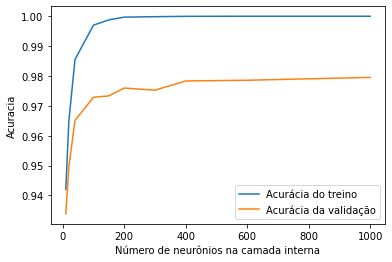

In [15]:
pd.DataFrame(acuracia_dict).T.plot()
plt.xlabel('Número de neurônios na camada interna')
plt.ylabel('Acuracia')
plt.show()

Até 600 neurônios na camada interna há uma alteração significativa na acuracia do modelo.

### Adição de mais uma camada de neurônios

In [16]:
%%time 

neurons_list = [10, 20, 40, 100, 200]
acuracia_dict = dict()

for value in neurons_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(600, input_shape = (784,), activation="relu"))
    m.add(keras.layers.Dense(value, input_shape = (600,), activation="relu"))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    H = m.fit(X_treino, y_treino, 
              batch_size = 200, epochs = 20, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[value] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)
    

Epoch 1/20
168/168 [==============================] - 1s 8ms/step - loss: 0.5804 - accuracy: 0.8251 - val_loss: 0.2526 - val_accuracy: 0.9362
Epoch 2/20
168/168 [==============================] - 1s 8ms/step - loss: 0.1921 - accuracy: 0.9480 - val_loss: 0.1797 - val_accuracy: 0.9507
Epoch 3/20
168/168 [==============================] - 2s 9ms/step - loss: 0.1274 - accuracy: 0.9647 - val_loss: 0.1518 - val_accuracy: 0.9586
Epoch 4/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0946 - accuracy: 0.9733 - val_loss: 0.1289 - val_accuracy: 0.9648
Epoch 5/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0704 - accuracy: 0.9807 - val_loss: 0.1117 - val_accuracy: 0.9702
Epoch 6/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0532 - accuracy: 0.9854 - val_loss: 0.1023 - val_accuracy: 0.9725
Epoch 7/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0419 - accuracy: 0.9890 - val_loss: 0.1025 - val_accuracy: 0.9720
Epoch 

168/168 [==============================] - 1s 8ms/step - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.1237 - val_accuracy: 0.9706
Epoch 19/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.1096 - val_accuracy: 0.9752
Epoch 20/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.1116 - val_accuracy: 0.9757
Epoch 1/20
168/168 [==============================] - 2s 9ms/step - loss: 0.3468 - accuracy: 0.8995 - val_loss: 0.1698 - val_accuracy: 0.9532
Epoch 2/20
168/168 [==============================] - 1s 8ms/step - loss: 0.1300 - accuracy: 0.9614 - val_loss: 0.1370 - val_accuracy: 0.9604
Epoch 3/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0808 - accuracy: 0.9764 - val_loss: 0.1074 - val_accuracy: 0.9693
Epoch 4/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0550 - accuracy: 0.9836 - val_loss: 0.1003 - val_accuracy: 0.9715
Epoch 5/20
168/

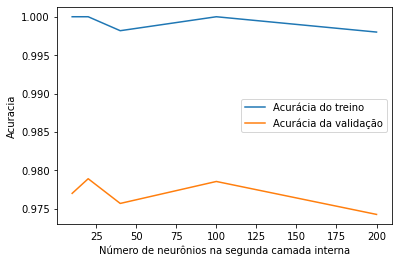

In [17]:
pd.DataFrame(acuracia_dict).T.plot()
plt.xlabel('Número de neurônios na segunda camada interna')
plt.ylabel('Acuracia')
plt.show()

A adição de mais uma camada de 25 neurônios melhorou um pouco o ajuste.

### Batch Size

In [18]:
%%time 

batch_size_list = [50, 70, 100, 200, 300, 400]
acuracia_dict = dict()

for value in batch_size_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(600, input_shape = (784,), activation="relu"))
    m.add(keras.layers.Dense(25, input_shape = (600,), activation="relu"))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    H = m.fit(X_treino, y_treino, 
              batch_size = value, epochs = 20, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[value] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/20
672/672 [==============================] - 3s 4ms/step - loss: 0.2828 - accuracy: 0.9185 - val_loss: 0.1578 - val_accuracy: 0.9542
Epoch 2/20
672/672 [==============================] - 3s 5ms/step - loss: 0.1088 - accuracy: 0.9674 - val_loss: 0.1167 - val_accuracy: 0.9668
Epoch 3/20
672/672 [==============================] - 3s 5ms/step - loss: 0.0682 - accuracy: 0.9793 - val_loss: 0.0950 - val_accuracy: 0.9717
Epoch 4/20
672/672 [==============================] - 3s 5ms/step - loss: 0.0476 - accuracy: 0.9849 - val_loss: 0.1079 - val_accuracy: 0.9704
Epoch 5/20
672/672 [==============================] - 3s 5ms/step - loss: 0.0335 - accuracy: 0.9899 - val_loss: 0.0910 - val_accuracy: 0.9763
Epoch 6/20
672/672 [==============================] - 3s 4ms/step - loss: 0.0269 - accuracy: 0.9913 - val_loss: 0.1039 - val_accuracy: 0.9719
Epoch 7/20
672/672 [==============================] - 3s 5ms/step - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.1260 - val_accuracy: 0.9681
Epoch 

336/336 [==============================] - 2s 5ms/step - loss: 0.0068 - accuracy: 0.9977 - val_loss: 0.1269 - val_accuracy: 0.9725
Epoch 19/20
336/336 [==============================] - 2s 5ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.1096 - val_accuracy: 0.9787
Epoch 20/20
336/336 [==============================] - 2s 5ms/step - loss: 6.1678e-04 - accuracy: 0.9999 - val_loss: 0.1218 - val_accuracy: 0.9764
Epoch 1/20
168/168 [==============================] - 1s 8ms/step - loss: 0.4053 - accuracy: 0.8820 - val_loss: 0.1906 - val_accuracy: 0.9465
Epoch 2/20
168/168 [==============================] - 1s 7ms/step - loss: 0.1450 - accuracy: 0.9582 - val_loss: 0.1360 - val_accuracy: 0.9602
Epoch 3/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0975 - accuracy: 0.9713 - val_loss: 0.1275 - val_accuracy: 0.9633
Epoch 4/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0696 - accuracy: 0.9796 - val_loss: 0.1079 - val_accuracy: 0.9681
Epoch 5/20


84/84 [==============================] - 1s 14ms/step - loss: 0.0070 - accuracy: 0.9993 - val_loss: 0.0971 - val_accuracy: 0.9767
Epoch 16/20
84/84 [==============================] - 1s 13ms/step - loss: 0.0055 - accuracy: 0.9995 - val_loss: 0.0965 - val_accuracy: 0.9768
Epoch 17/20
84/84 [==============================] - 1s 13ms/step - loss: 0.0043 - accuracy: 0.9998 - val_loss: 0.0975 - val_accuracy: 0.9771
Epoch 18/20
84/84 [==============================] - 1s 14ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0971 - val_accuracy: 0.9773
Epoch 19/20
84/84 [==============================] - 1s 12ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0979 - val_accuracy: 0.9774
Epoch 20/20
84/84 [==============================] - 1s 12ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0973 - val_accuracy: 0.9777
CPU times: user 9min, sys: 34.3 s, total: 9min 34s
Wall time: 3min 47s


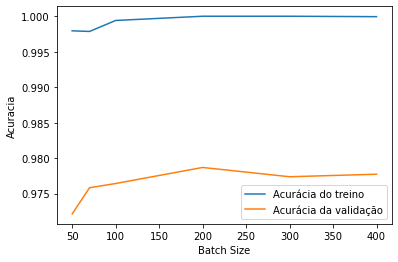

In [19]:
pd.DataFrame(acuracia_dict).T.plot()
plt.xlabel('Batch Size')
plt.ylabel('Acuracia')
plt.show()

Parece que o batch size de 200 otimizar o tempo e possui um bom resultado (em 75 parece ter um pico mas ele é um efeito da aleatóriedade do modelo)

### Funções de ativação

In [20]:
activation_list = ['relu', 'selu', 'tanh', 'sigmoid']
acuracia_dict = dict()

for activation in activation_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(600, input_shape = (784,), activation=activation))
    m.add(keras.layers.Dense(25, input_shape = (600,), activation=activation))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    H = m.fit(X_treino, y_treino, 
              batch_size = 200, epochs = 20, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[activation] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/20
168/168 [==============================] - 2s 13ms/step - loss: 0.4094 - accuracy: 0.8800 - val_loss: 0.2068 - val_accuracy: 0.9407
Epoch 2/20
168/168 [==============================] - 1s 8ms/step - loss: 0.1529 - accuracy: 0.9560 - val_loss: 0.1414 - val_accuracy: 0.9602
Epoch 3/20
168/168 [==============================] - 1s 8ms/step - loss: 0.1030 - accuracy: 0.9696 - val_loss: 0.1158 - val_accuracy: 0.9677
Epoch 4/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0729 - accuracy: 0.9787 - val_loss: 0.1090 - val_accuracy: 0.9700
Epoch 5/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0535 - accuracy: 0.9849 - val_loss: 0.0972 - val_accuracy: 0.9729
Epoch 6/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0400 - accuracy: 0.9885 - val_loss: 0.0994 - val_accuracy: 0.9700
Epoch 7/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0293 - accuracy: 0.9921 - val_loss: 0.0847 - val_accuracy: 0.9774
Epoch

168/168 [==============================] - 1s 8ms/step - loss: 0.0061 - accuracy: 0.9995 - val_loss: 0.0905 - val_accuracy: 0.9746
Epoch 19/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0052 - accuracy: 0.9996 - val_loss: 0.0879 - val_accuracy: 0.9748
Epoch 20/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0085 - accuracy: 0.9987 - val_loss: 0.0946 - val_accuracy: 0.9743
Epoch 1/20
168/168 [==============================] - 1s 8ms/step - loss: 1.2562 - accuracy: 0.7293 - val_loss: 0.7337 - val_accuracy: 0.8773
Epoch 2/20
168/168 [==============================] - 1s 8ms/step - loss: 0.5644 - accuracy: 0.8948 - val_loss: 0.4459 - val_accuracy: 0.9095
Epoch 3/20
168/168 [==============================] - 1s 7ms/step - loss: 0.3773 - accuracy: 0.9170 - val_loss: 0.3291 - val_accuracy: 0.9224
Epoch 4/20
168/168 [==============================] - 1s 8ms/step - loss: 0.2895 - accuracy: 0.9301 - val_loss: 0.2678 - val_accuracy: 0.9323
Epoch 5/20
168/

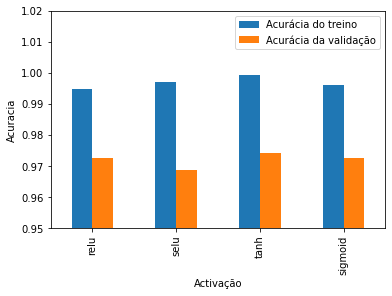

In [21]:
pd.DataFrame(acuracia_dict).T.plot.bar()
plt.xlabel('Activação')
plt.ylabel('Acuracia')
plt.ylim(0.95, 1.02)
plt.show()

A melhor função de ativação foi relu

### Optimizer

In [22]:
optimizer_list = ['SGD', 'RMSprop', 'Adam', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
acuracia_dict = dict()

for optimizer in optimizer_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(600, input_shape = (784,), activation='relu'))
    m.add(keras.layers.Dense(25, input_shape = (600,), activation='relu'))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    H = m.fit(X_treino, y_treino, 
              batch_size = 200, epochs = 20, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[optimizer] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/20
168/168 [==============================] - 1s 8ms/step - loss: 1.8378 - accuracy: 0.4915 - val_loss: 1.3128 - val_accuracy: 0.7518
Epoch 2/20
168/168 [==============================] - 1s 8ms/step - loss: 0.9928 - accuracy: 0.7970 - val_loss: 0.7590 - val_accuracy: 0.8364
Epoch 3/20
168/168 [==============================] - 1s 7ms/step - loss: 0.6505 - accuracy: 0.8487 - val_loss: 0.5622 - val_accuracy: 0.8642
Epoch 4/20
168/168 [==============================] - 1s 7ms/step - loss: 0.5156 - accuracy: 0.8696 - val_loss: 0.4722 - val_accuracy: 0.8820
Epoch 5/20
168/168 [==============================] - 1s 7ms/step - loss: 0.4466 - accuracy: 0.8818 - val_loss: 0.4221 - val_accuracy: 0.8915
Epoch 6/20
168/168 [==============================] - 1s 9ms/step - loss: 0.4040 - accuracy: 0.8915 - val_loss: 0.3884 - val_accuracy: 0.8980
Epoch 7/20
168/168 [==============================] - 1s 7ms/step - loss: 0.3745 - accuracy: 0.8975 - val_loss: 0.3638 - val_accuracy: 0.9038
Epoch 

168/168 [==============================] - 1s 8ms/step - loss: 8.1097e-04 - accuracy: 1.0000 - val_loss: 0.1017 - val_accuracy: 0.9781
Epoch 19/20
168/168 [==============================] - 1s 8ms/step - loss: 6.4332e-04 - accuracy: 1.0000 - val_loss: 0.1015 - val_accuracy: 0.9779
Epoch 20/20
168/168 [==============================] - 1s 8ms/step - loss: 5.7022e-04 - accuracy: 1.0000 - val_loss: 0.1029 - val_accuracy: 0.9779
Epoch 1/20
168/168 [==============================] - 1s 9ms/step - loss: 2.3207 - accuracy: 0.0907 - val_loss: 2.3021 - val_accuracy: 0.1065
Epoch 2/20
168/168 [==============================] - 1s 8ms/step - loss: 2.2789 - accuracy: 0.1190 - val_loss: 2.2612 - val_accuracy: 0.1382
Epoch 3/20
168/168 [==============================] - 1s 8ms/step - loss: 2.2394 - accuracy: 0.1592 - val_loss: 2.2221 - val_accuracy: 0.1840
Epoch 4/20
168/168 [==============================] - 1s 8ms/step - loss: 2.2007 - accuracy: 0.2090 - val_loss: 2.1834 - val_accuracy: 0.2363
Epo

168/168 [==============================] - 1s 9ms/step - loss: 0.0273 - accuracy: 0.9946 - val_loss: 0.0932 - val_accuracy: 0.9727
Epoch 16/20
168/168 [==============================] - 2s 9ms/step - loss: 0.0245 - accuracy: 0.9948 - val_loss: 0.0921 - val_accuracy: 0.9755
Epoch 17/20
168/168 [==============================] - 2s 9ms/step - loss: 0.0206 - accuracy: 0.9966 - val_loss: 0.0913 - val_accuracy: 0.9743
Epoch 18/20
168/168 [==============================] - 2s 9ms/step - loss: 0.0183 - accuracy: 0.9971 - val_loss: 0.0904 - val_accuracy: 0.9749
Epoch 19/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0162 - accuracy: 0.9972 - val_loss: 0.0934 - val_accuracy: 0.9748
Epoch 20/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0139 - accuracy: 0.9979 - val_loss: 0.0891 - val_accuracy: 0.9751
Epoch 1/20
168/168 [==============================] - 2s 11ms/step - loss: 0.4115 - accuracy: 0.8873 - val_loss: 0.1981 - val_accuracy: 0.9438
Epoch 2/20


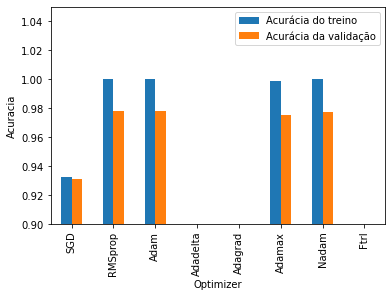

In [23]:
pd.DataFrame(acuracia_dict).T.plot.bar()
plt.xlabel('Optimizer')
plt.ylabel('Acuracia')
plt.ylim(0.90, 1.05)
plt.show()

As otimizações RMSprop, Adam, Adamax e Nadam apresentaram o mesmo resultado.

## Dropout

In [ ]:
dropout_list = [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.8, 0.9]
acuracia_dict = dict()

for dropout in dropout_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(600, input_shape = (784,), activation='relu'))
    m.add(keras.layers.Dropout(dropout))
    m.add(keras.layers.Dense(25, input_shape = (600,), activation='relu'))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    

    H = m.fit(X_treino, y_treino, 
              batch_size = 200, epochs = 20, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[dropout] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/20
168/168 [==============================] - 2s 9ms/step - loss: 0.4217 - accuracy: 0.8793 - val_loss: 0.2158 - val_accuracy: 0.9368
Epoch 2/20
168/168 [==============================] - 1s 9ms/step - loss: 0.1596 - accuracy: 0.9541 - val_loss: 0.1395 - val_accuracy: 0.9606
Epoch 3/20
168/168 [==============================] - 1s 9ms/step - loss: 0.1048 - accuracy: 0.9698 - val_loss: 0.1161 - val_accuracy: 0.9679
Epoch 4/20
106/168 [=================>............] - ETA: 0s - loss: 0.0742 - accuracy: 0.9781

In [ ]:
pd.DataFrame(acuracia_dict).T.plot.bar()
plt.xlabel('Dropout')
plt.ylabel('Acuracia')
plt.ylim(0.94, 1.05)
plt.show()

Parece que um Dropout de até 0.5 o Dropout não influênciou a precisão do modelo mas diminuiu o sobre ajuste. Após isso começa a diminuir a precisão. Provavelmente indicando que uma primeira camada com metade dos neurônios já é o suficiente.

In [43]:
m = keras.models.Sequential()

m.add(keras.layers.Dense(300, input_shape = (784,), activation='relu'))
m.add(keras.layers.Dense(25, input_shape = (600,), activation='relu'))
m.add(keras.layers.Dense(10, activation="softmax"))

m.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

H = m.fit(X_treino, y_treino, 
          batch_size = 200, epochs = 20, 
          validation_data = (X_validacao, y_validacao));

acuracia_dict[optimizer] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/20
168/168 [==============================] - 1s 5ms/step - loss: 0.5221 - accuracy: 0.8531 - val_loss: 0.2652 - val_accuracy: 0.9256
Epoch 2/20
168/168 [==============================] - 1s 4ms/step - loss: 0.2091 - accuracy: 0.9406 - val_loss: 0.1911 - val_accuracy: 0.9467
Epoch 3/20
168/168 [==============================] - 1s 4ms/step - loss: 0.1534 - accuracy: 0.9551 - val_loss: 0.1621 - val_accuracy: 0.9521
Epoch 4/20
168/168 [==============================] - 1s 4ms/step - loss: 0.1203 - accuracy: 0.9642 - val_loss: 0.1445 - val_accuracy: 0.9569
Epoch 5/20
168/168 [==============================] - 1s 4ms/step - loss: 0.0975 - accuracy: 0.9721 - val_loss: 0.1334 - val_accuracy: 0.9605
Epoch 6/20
168/168 [==============================] - 1s 4ms/step - loss: 0.0814 - accuracy: 0.9761 - val_loss: 0.1203 - val_accuracy: 0.9656
Epoch 7/20
168/168 [==============================] - 1s 4ms/step - loss: 0.0681 - accuracy: 0.9807 - val_loss: 0.1180 - val_accuracy: 0.9643
Epoch 

In [39]:
acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

{'Acurácia do treino': 0.9999404761904762,
 'Acurácia da validação': 0.9763095238095238}

Metade dos neurônios renderam um resultado ainda sim muito próximo.

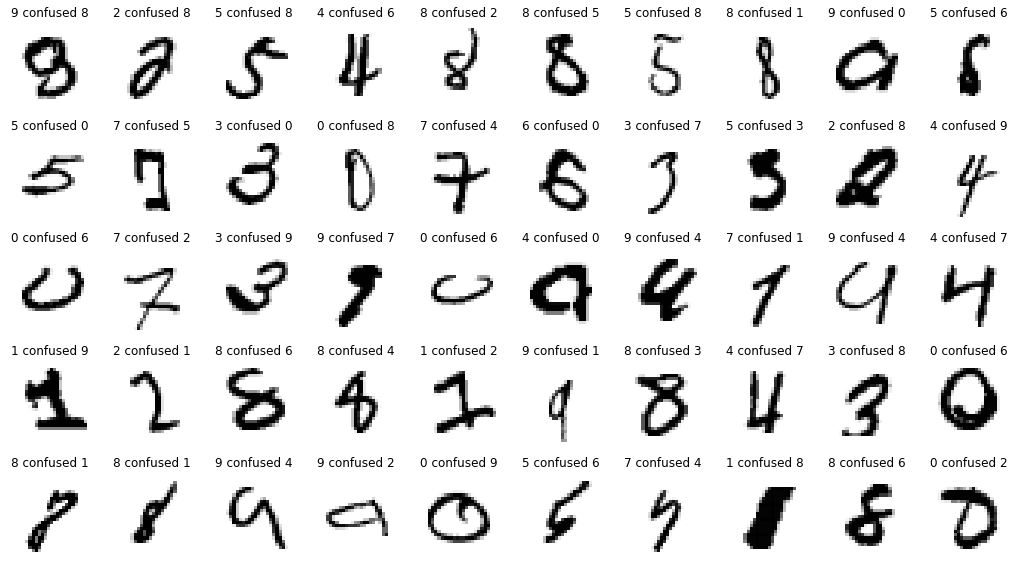

In [40]:
plot_erros(m, X_validacao, y_validacao)

In [29]:
y_pred = m.predict(X_validacao)
y_pred = np.argmax(y_pred, axis=1)

predicao = pd.DataFrame(data={'predicao':y_pred, 'target':y_validacao})
predicao_erros = predicao[predicao.predicao != predicao.target]

predicao_erros

,predicao,target
67,8,2
358,6,4
407,6,0
476,2,7
509,5,8
...,...,...
8133,1,4
8169,7,9
8265,1,2
8278,8,1


In [30]:
acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

{'Acurácia do treino': 1.0, 'Acurácia da validação': 0.978452380952381}

O modelo conseguiu alcançar 98% de taxa de acerto. Existem ainda pontos onde pode ser melhorados, vendo as imagens que ele falhou a reconhecer é possível perceber claramente porque ele tem tanta dificuldade em localizar os padrões.